In [1]:
#Manipulação de dados
import pandas as pd
import numpy as np
#Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns
#Bibliotecas relacionadas ao pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#Modelos de aprendizagem de máquina
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import GridSearchCV
#Métricas
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('london_weather.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [4]:
df.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


## Engenharia de Atributos

In [5]:
#Aqui estamos renomeando as colunas para seus nomes em português
df.rename(columns={
    'date': 'data',
    'cloud_cover': 'cobertura_nuvens',
    'sunshine': 'insolação',
    'global_radiation': 'radiação_global',
    'max_temp': 'temp_max',
    'mean_temp': 'temp_média',
    'min_temp': 'temp_min',
    'precipitation': 'precipitação',
    'pressure': 'pressão',
    'snow_depth': 'profundidade_da_neve',
    'year': 'ano',
    'month': 'mês',
    'month_label': 'rotulo_mes', #essa é uma coluna vazia que será preenchida para rotular os meses caso usados em visualização
    'decade': 'década'
}, inplace=True)

In [6]:
#Em preparação para nossa visualização de dados, iremos criar algumas novas features no nosso conjunto de dados
#precisaremos extrair o 'ano' e o 'mês' da coluna 'data', mas antes de fazer isso, precisaremos atribuir o tipo de dado adequado.
df['data'] = pd.to_datetime(df['data'], format='%Y%m%d')

In [7]:
#Agora estamos livres para extrair o ano e o mês da nossa coluna de data!
df['ano'] = df['data'].dt.year
df['mês'] = df['data'].dt.month
#Para fins de visualização de dados, também vamos criar uma coluna para os rótulos dos meses
# Criar um dicionário de mapeamento dos números dos meses para os rótulos dos meses
rotulos_meses = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Ago'}
# Adicionar uma nova coluna 'rotulo_mes' com os rótulos dos meses
df['rotulo_mes'] = df['mês'].map(rotulos_meses)

In [8]:
# Lista de métricas para calcular a média
df_metricas = ['cobertura_nuvens', 'insolação', 'radiação_global', 'temp_max', 'temp_média', 'temp_min', 'precipitação',
                'pressão', 'profundidade_da_neve']

# Agrupar por 'ano' e 'mês', e então calcular a média para as métricas especificadas
df_por_mes = df.groupby(['ano', 'mês'], as_index=False)[df_metricas].mean()

## Lidando com dados 'NA'

In [9]:
total_cells = np.product(df.shape) #product function multiplies all elements in input, in this case 104 rows xs 14 columns)
total_missing_values = (df.isnull().sum()).sum()
print(total_missing_values)
# percent of data that is missing
percent_missing = (total_missing_values/total_cells) * 100

print('\nDados Nulos Correspondem à apenas ' + str(round(percent_missing, 2)) + ' % dos dados totais.')
print("="*70)
print(df.isnull().sum())

6657

Dados Nulos Correspondem à apenas 3.34 % dos dados totais.
data                       0
cobertura_nuvens          19
insolação                  0
radiação_global           19
temp_max                   6
temp_média                36
temp_min                   2
precipitação               6
pressão                    4
profundidade_da_neve    1441
ano                        0
mês                        0
rotulo_mes              5124
dtype: int64


In [10]:
# Isolando colunas para imputação
cols_imputacao = ['cobertura_nuvens', 'radiação_global', 'temp_média', 'temp_max', 'temp_min', 'precipitação', 'profundidade_da_neve', 'pressão']
# Faremos uso do SimpleImputer
imp = SimpleImputer(strategy='mean')
# Agora podemos ajustar o nosso DataFrame ao imputer
imp.fit(df[cols_imputacao])
df[cols_imputacao] = imp.transform(df[cols_imputacao])

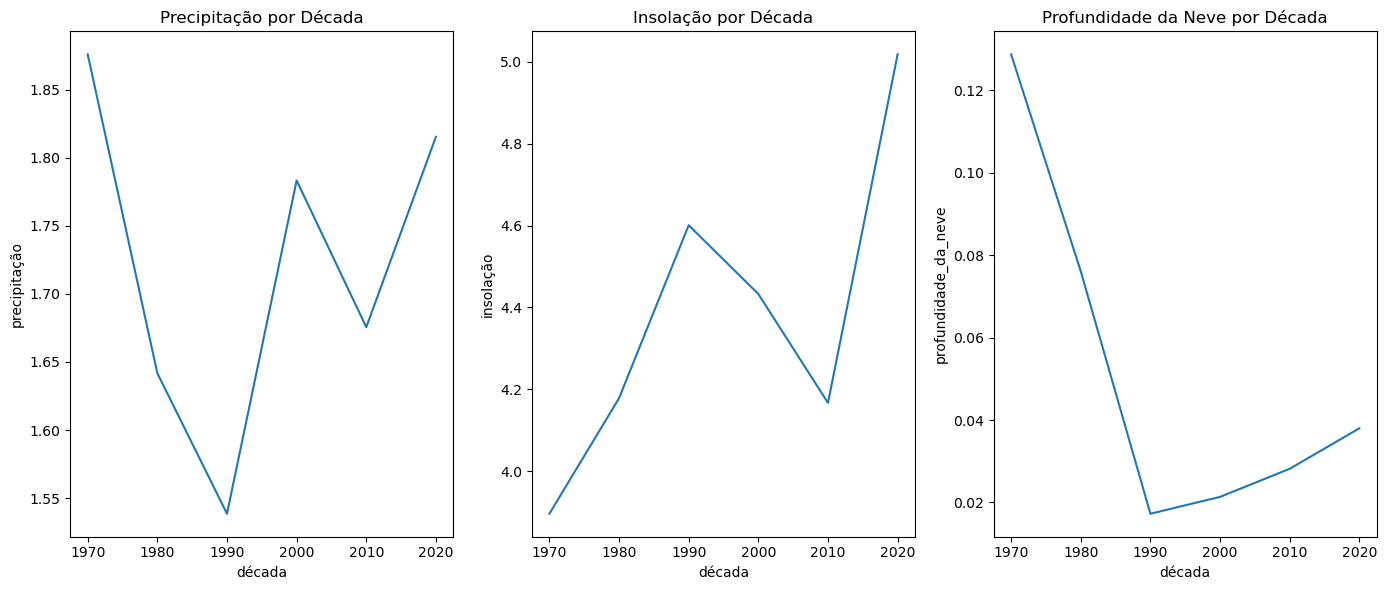

In [11]:
# Calcular a década para cada ano
df["década"] = (df["ano"] // 10) * 10

# Agrupar os dados por década e verificar se está funcionando corretamente
df_por_decada = df.groupby('década')[['precipitação', 'insolação', 'profundidade_da_neve']].mean()

# Criar uma figura e definir o tamanho
plt.figure(figsize=(14, 6))

# Gráfico de linhas para Precipitação
plt.subplot(1, 3, 1)
sns.lineplot(x=df_por_decada.index, y="precipitação", data=df_por_decada)
plt.title("Precipitação por Década")

# Gráfico de linhas para Insolação
plt.subplot(1, 3, 2)
sns.lineplot(x=df_por_decada.index, y="insolação", data=df_por_decada)
plt.title("Insolação por Década")

# Gráfico de linhas para Profundidade da Neve
plt.subplot(1, 3, 3)
sns.lineplot(x=df_por_decada.index, y="profundidade_da_neve", data=df_por_decada)
plt.title("Profundidade da Neve por Década")

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


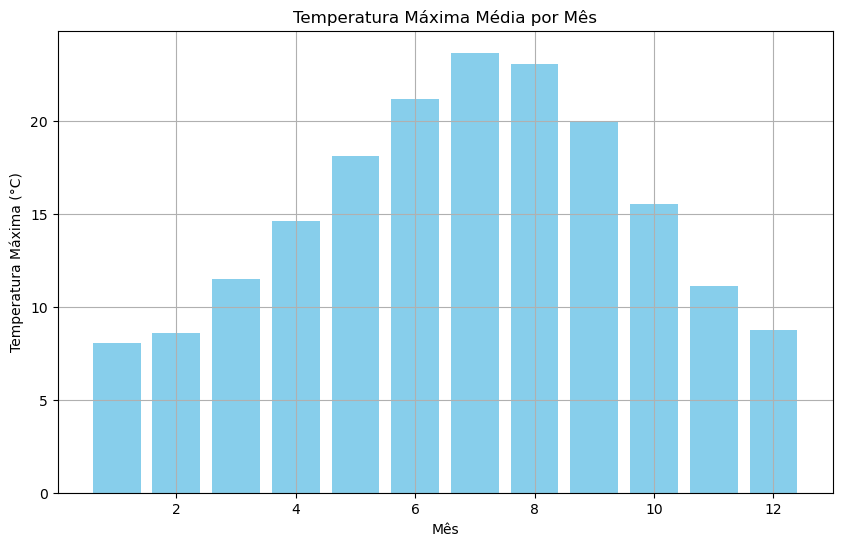

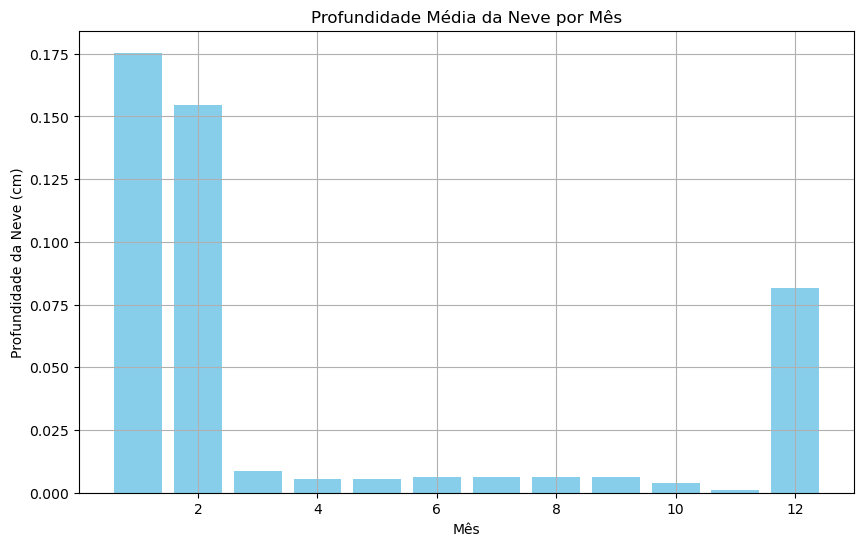

In [23]:
# Agrupar os dados por 'mês' e calcular a média para cada mês
temp_max_por_mes = df.groupby('mês')['temp_max'].mean()
profundidade_da_neve_por_mes = df.groupby('mês')['profundidade_da_neve'].mean()

# Obter a lista de meses para o eixo x
meses = df['mês'].unique()

# Criar um gráfico de barras para a temperatura máxima por mês
plt.figure(figsize=(10, 6))
plt.bar(meses, temp_max_por_mes, color='skyblue')
plt.xlabel('Mês')
plt.ylabel('Temperatura Máxima (°C)')
plt.title('Temperatura Máxima Média por Mês')
plt.grid(True)
plt.show()

# Criar um gráfico de barras para a profundidade da neve por mês
plt.figure(figsize=(10, 6))
plt.bar(meses, profundidade_da_neve_por_mes, color='skyblue')
plt.xlabel('Mês')
plt.ylabel('Profundidade da Neve (cm)')
plt.title('Profundidade Média da Neve por Mês')
plt.grid(True)
plt.show()


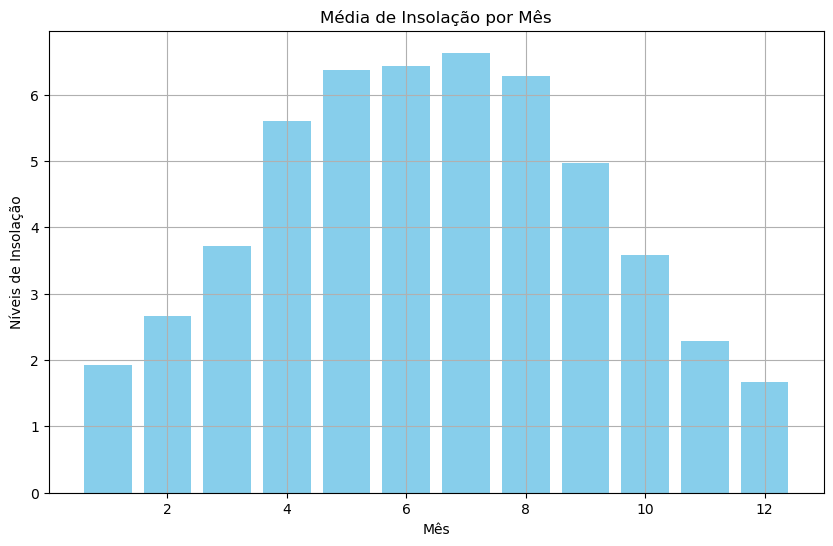

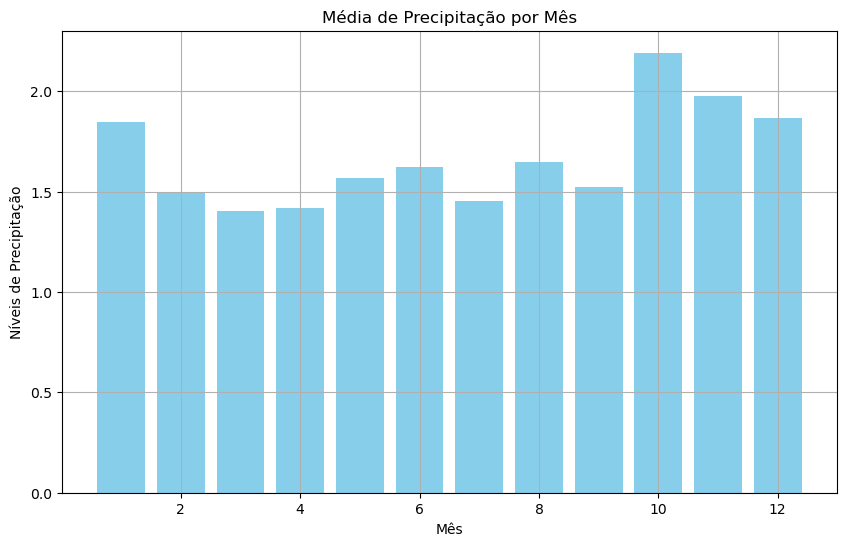

In [24]:
# Agora avaliaremos os níveis de insolação e precipitação ao longo dos meses
insolacao_por_mes = df.groupby('mês')['insolação'].mean()
precipitacao_por_mes = df.groupby('mês')['precipitação'].mean()

# Criar um gráfico de barras para os níveis de insolação por mês
plt.figure(figsize=(10, 6))
plt.bar(meses, insolacao_por_mes, color='skyblue')
plt.xlabel('Mês')
plt.ylabel('Níveis de Insolação')
plt.title('Média de Insolação por Mês')
plt.grid(True)
plt.show()

# Criar um gráfico de barras para os níveis de precipitação por mês
plt.figure(figsize=(10, 6))
plt.bar(meses, precipitacao_por_mes, color='skyblue')
plt.xlabel('Mês')
plt.ylabel('Níveis de Precipitação')
plt.title('Média de Precipitação por Mês')
plt.grid(True)
plt.show()


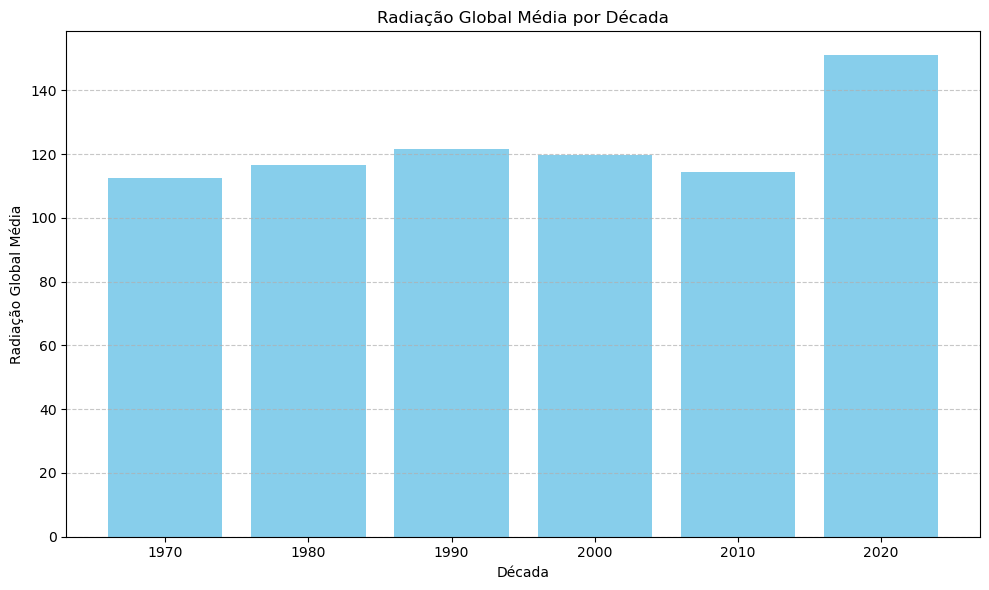

In [15]:
# Calcular a radiação global média para cada década
df['década'] = df['ano'] // 10 * 10
radiacao_global_por_decada = df.groupby('década')['radiação_global'].mean().reset_index()

# Criar o Gráfico de Barras para a radiação global média por década
plt.figure(figsize=(10, 6))
plt.bar(radiacao_global_por_decada['década'], radiacao_global_por_decada['radiação_global'], color='skyblue', width=8)
plt.title('Radiação Global Média por Década')
plt.xlabel('Década')
plt.ylabel('Radiação Global Média')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(radiacao_global_por_decada['década'])
plt.tight_layout()
plt.show()

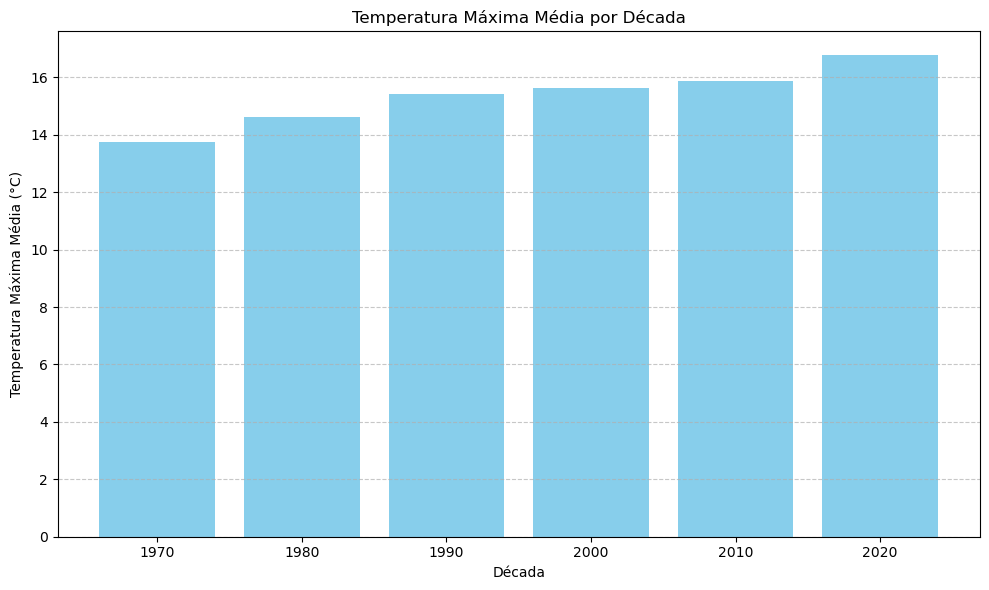

In [16]:
# Calcular a temperatura máxima média para cada década
df['década'] = df['ano'] // 10 * 10
temp_max_media_por_decada = df.groupby('década')['temp_max'].mean().reset_index()

# Criar o Gráfico de Barras para a temperatura máxima média por década
plt.figure(figsize=(10, 6))
plt.bar(temp_max_media_por_decada['década'], temp_max_media_por_decada['temp_max'], color='skyblue', width=8)
plt.title('Temperatura Máxima Média por Década')
plt.xlabel('Década')
plt.ylabel('Temperatura Máxima Média (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(temp_max_media_por_decada['década'])

plt.tight_layout()
plt.show()

Podemos observar que, assim como a temperatura, os níveis de radiação global também apresentaram crescimento. No entanto, enquanto a temperatura teve um aumento constante, a radiação apresentou oscilações mais desordenadas que não refletem o aumento da temperatura. Isso mostra que a correlação entre esses dois fatores não é muito forte.

## Predição de temperatura.

In [19]:
# Precisamos dividir nossos dados antes de começar nosso experimento!
atributos = ['mês', 'cobertura_nuvens', 'insolação', 'precipitação', 'pressão', 'radiação_global']
alvo = ['temp_média']

X = df[atributos]
y = df[alvo]

# Treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Redefinir as variáveis-alvo
y_treino = np.ravel(y_treino)
y_teste = np.ravel(y_teste)

# Criar e ajustar o modelo de Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_treino, y_treino)

# Fazer previsões com os dados de teste
y_pred_lr = modelo_lr.predict(X_teste)

# Calcular o Erro Quadrático Médio (MSE) e a pontuação R-quadrado
mse_lr = mean_squared_error(y_teste, y_pred_lr)
r2_lr = r2_score(y_teste, y_pred_lr)
print("MSE da Regressão Linear nos dados de teste:", mse_lr)
print("Pontuação R-quadrado da Regressão Linear nos dados de teste:", r2_lr)

MSE da Regressão Linear nos dados de teste: 14.13681546223843
Pontuação R-quadrado da Regressão Linear nos dados de teste: 0.5656356688927576


In [21]:
# Definir o modelo SVR
modelo_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Treinar o modelo com os dados de treinamento normalizados
modelo_svr.fit(X_treino, y_treino)

# Fazer previsões com o conjunto de teste normalizado
y_pred = modelo_svr.predict(X_teste)

# Avaliar o modelo
mse = mean_squared_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)

print("Erro Quadrático Médio:", mse)
print("Pontuação R^2:", r2)

Erro Quadrático Médio: 32.45440121267986
Pontuação R^2: 0.0028140133902806452


In [22]:
## Redefinir as variáveis-alvo
y_treino = np.ravel(y_treino)
y_teste = np.ravel(y_teste)

# Criar e ajustar o modelo Random Forest Regressor
modelo_rf = RandomForestRegressor(n_estimators=300, max_depth=None, min_samples_split=10, min_samples_leaf=4,
                                  max_features='log2')
modelo_rf.fit(X_treino, y_treino)

# Fazer previsões com os dados de teste
y_pred_rf = modelo_rf.predict(X_teste)

# Avaliar o modelo usando o Erro Quadrático Médio (MSE)
mse_rf = mean_squared_error(y_teste, y_pred_rf)
r2_rf = r2_score(y_teste, y_pred_rf)
print("MSE do Random Forest Regressor nos dados de teste:", mse_rf)
print("Pontuação R-quadrado do Random Forest Regressor nos dados de teste:", r2_rf)

MSE do Random Forest Regressor nos dados de teste: 7.708972355211186
Pontuação R-quadrado do Random Forest Regressor nos dados de teste: 0.763136002620966


Em nossa previsão, o modelo que melhor se ajustou às nossas necessidades foi o modelo de Random Forest. O Random Forest Regressor teve o melhor desempenho geral entre os modelos testados, apresentando o menor MSE e a maior pontuação R².